# Load Libary

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, activation
from keras.utils import np_utils
from keras.datasets import mnist
from keras import utils

# Load Datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

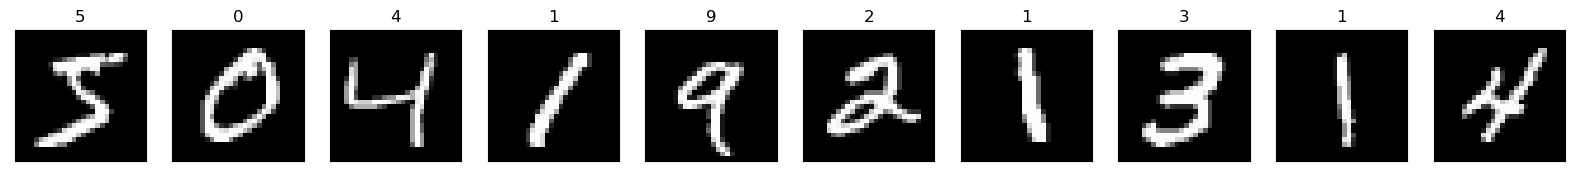

In [7]:
fig, ax = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize=(20,15))
for i in range(10):
    ax[i].set_title(y_train[i])
    ax[i].imshow(X_train[i], cmap = 'gray')
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
plt.show()

# Change Shape Of X_train and X_test

In [8]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test.shape

(10000, 28, 28, 1)

In [11]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [12]:
X_train /= 255
X_test /=255

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Model

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation ='relu',kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [16]:
utils.plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['acc'])

history = model.fit(X_train, y_train , batch_size = 32, epochs = 5, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1507 - acc: 0.9538 - val_loss: 0.0561 - val_acc: 0.9807
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0488 - acc: 0.9847 - val_loss: 0.0647 - val_acc: 0.9779
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0313 - acc: 0.9903 - val_loss: 0.0542 - val_acc: 0.9833
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0423 - val_acc: 0.9874
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0128 - acc: 0.9958 - val_loss: 0.0468 - val_acc: 0.9869


In [18]:
model.save('mnist_model_cnn.h5')

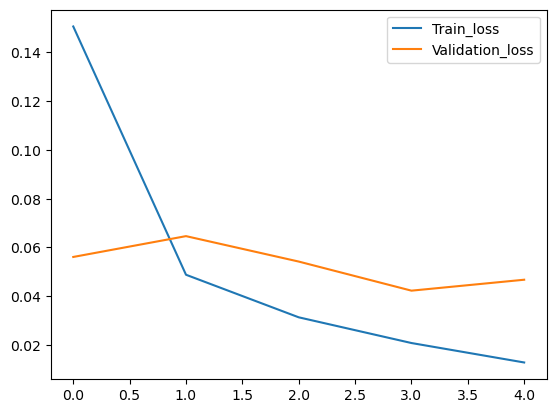

In [19]:
plt.plot(history.history['loss'], label = 'Train_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.legend()

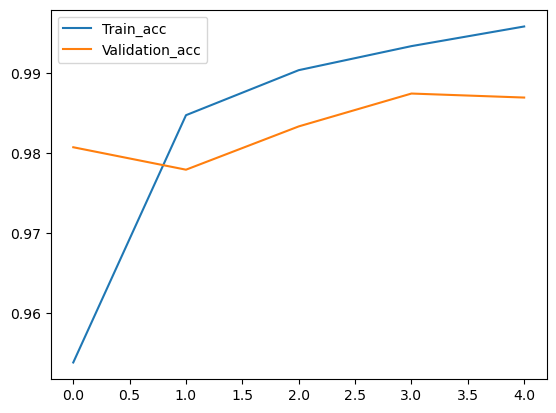

In [20]:
plt.plot(history.history['acc'], label = 'Train_acc')
plt.plot(history.history['val_acc'], label = 'Validation_acc')
plt.legend()

In [21]:
model = keras.models.load_model('mnist_model_cnn.h5')

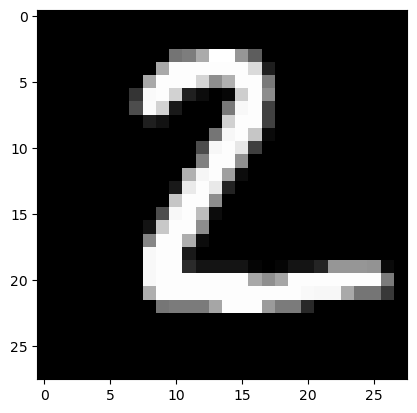

In [22]:
plt.imshow(X_test[1],cmap = 'gray')

In [23]:
x = np.reshape(X_test[1],(1,28,28,1))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 78ms/step


2

In [24]:
model.predict(x)

1/1 [==============================] - 0s 16ms/step


array([[2.0420998e-11, 1.2801256e-06, 9.9999869e-01, 1.2358108e-12,
        4.3440449e-15, 2.4426119e-17, 4.4212936e-10, 3.5417624e-11,
        5.3123772e-10, 4.9992430e-14]], dtype=float32)